In [137]:
#Importing libraries and Raw data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split

In [138]:
df= pd.read_csv('heart_failure_clinical_records_dataset-2.csv')
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0      0.0                     582.0       0.0               20.0   
1  55.0      0.0                    7861.0       0.0               38.0   
2  65.0      0.0                     146.0       0.0               20.0   
3  50.0      NaN                     111.0       0.0               20.0   
4  65.0      1.0                     160.0       1.0                NaN   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium     sex  \
0                    1  265000.00               1.9         130.0    Male   
1                    0  263358.03               1.1         136.0    Male   
2                    0  162000.00               1.3         129.0    Male   
3                    0  210000.00               1.9         137.0    Male   
4                    0  327000.00               2.7         116.0  Female   

  smoking  time DEATH_EVENT  
0     No      4       Death  
1     No      6       Death  
2     Yes     7       Death  
3     No      7       Death  
4     No      8       Death

In [139]:
#Profiling of variables
import pandas_profiling as pp
pp.ProfileReport(df)

<AxesSubplot:>

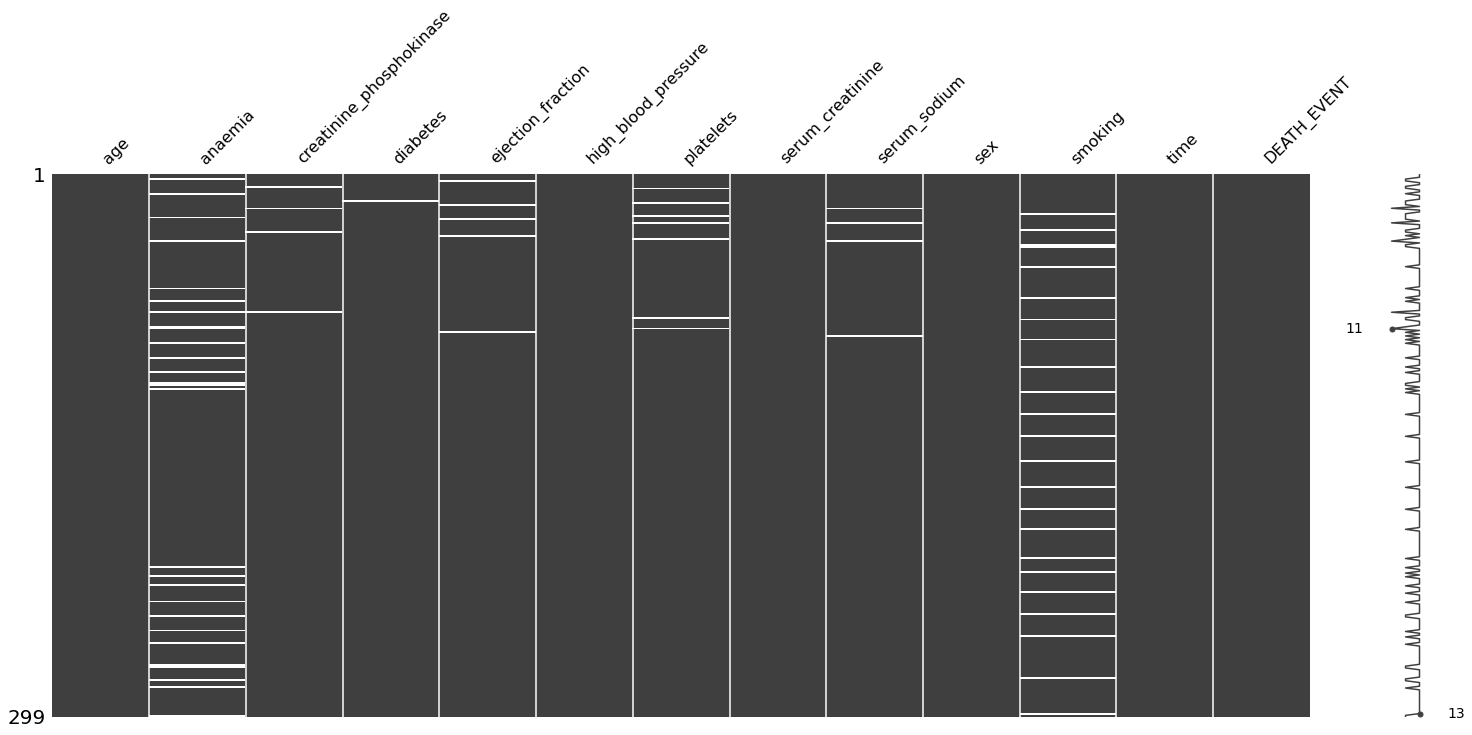

In [103]:
#Finding Missing Values 
msno.matrix(df)

In [104]:
#Replacing missing Values with column means 
df.anaemia = df.anaemia.fillna('1')
df['creatinine_phosphokinase'].median()
df.creatinine_phosphokinase = df.creatinine_phosphokinase.fillna(250)
df.diabetes = df.diabetes.fillna('1')
df['ejection_fraction'].median()
df.ejection_fraction = df.ejection_fraction.fillna(38)
df['platelets'].median()
df.platelets = df.platelets.fillna(259500.0)
df['serum_sodium'].median()
df.serum_sodium = df.serum_sodium.fillna(137.0)
df.smoking = df.smoking.fillna('No')
df.head()

age anaemia  creatinine_phosphokinase diabetes  ejection_fraction  \
0  75.0       0                     582.0        0               20.0   
1  55.0       0                    7861.0        0               38.0   
2  65.0       0                     146.0        0               20.0   
3  50.0       1                     111.0        0               20.0   
4  65.0       1                     160.0        1               38.0   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium     sex  \
0                    1  265000.00               1.9         130.0    Male   
1                    0  263358.03               1.1         136.0    Male   
2                    0  162000.00               1.3         129.0    Male   
3                    0  210000.00               1.9         137.0    Male   
4                    0  327000.00               2.7         116.0  Female   

  smoking  time DEATH_EVENT  
0     No      4       Death  
1     No      6       Death  
2     Yes     7       Death  
3     No      7       Death  
4     No      8       Death

In [105]:
#Dummy Coding
df['sex'].replace('Male',1)
df['sex'] = np.where(df['sex'].str.contains('Male'), 1, 0)
df['smoking'] = np.where(df['smoking'].str.contains('Yes I smoke'), 1, 0)
df['DEATH_EVENT'] = np.where(df['DEATH_EVENT'].str.contains("Death"), 1, 0)
df.head()

age anaemia  creatinine_phosphokinase diabetes  ejection_fraction  \
0  75.0       0                     582.0        0               20.0   
1  55.0       0                    7861.0        0               38.0   
2  65.0       0                     146.0        0               20.0   
3  50.0       1                     111.0        0               20.0   
4  65.0       1                     160.0        1               38.0   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9         130.0    1   
1                    0  263358.03               1.1         136.0    1   
2                    0  162000.00               1.3         129.0    1   
3                    0  210000.00               1.9         137.0    1   
4                    0  327000.00               2.7         116.0    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        0     7            1  
3        0     7            1  
4        0     8            1

In [106]:
#Counting Values for Data Exploration visualizations 
df1 = df.groupby(["sex","diabetes","smoking","anaemia","high_blood_pressure","DEATH_EVENT"])["age"].count().reset_index()
df1.columns= ["sex","diabetes","smoking","anaemia","high_blood_pressure","DEATH_EVENT", "count"]


In [107]:
#DDescriptive statistics-Plotting a sun burst chart 
df1.loc[df1["sex"]== 0 , "sex"] = "female"
df1.loc[df1["sex"]== 1, "sex"] = "male"

df1.loc[df1["diabetes"]== 0 , "diabetes"] = "no diabetes"
df1.loc[df1["diabetes"]== 1, "diabetes"] = "diabetes"

df1.loc[df1['DEATH_EVENT'] == 0,'DEATH_EVENT'] = "LIVE"
df1.loc[df1['DEATH_EVENT'] == 1, 'DEATH_EVENT'] = 'DEATH'

fig = px.sunburst(df1, 
                  path=["sex","diabetes","DEATH_EVENT"],
                  values="count",
                  title="Gender & Diabetes Sunburst Chart ",
                  width=600,
                  height=600)

fig.show()

In [108]:
df1.loc[df1["smoking"]== 0 , "smoking"] = "non smoking"
df1.loc[df1["smoking"]== 1, "smoking"] = "smoking"

fig = px.sunburst(df1, 
                  path=["sex","smoking","DEATH_EVENT"],
                  values="count",
                  title="Gender & Smoking Sunburst Chart ",
                  width=600,
                  height=600)

fig.show()

In [109]:
df1.loc[df1["anaemia"]== 0 , "anaemia"] = "no anaemia"
df1.loc[df1["anaemia"]== 1, "anaemia"] = "anaemia"

fig = px.sunburst(df1, 
                  path=["sex","anaemia","DEATH_EVENT"],
                  values="count",
                  title="Gender & Anaemia  Sunburst Chart ",
                  width=600,
                  height=600)

fig.show()

In [110]:
df1.loc[df1["high_blood_pressure"]== 0 , "high_blood_pressure"] = "no high_blood_pressure"
df1.loc[df1["high_blood_pressure"]== 1, "high_blood_pressure"] = "high_blood_pressure"

fig = px.sunburst(df1, 
                  path=["sex","high_blood_pressure","DEATH_EVENT"],
                  values="count",
                  title="Gender & High Blood Pressure Sunburst Chart ",
                  width=600,
                  height=600)

fig.show()

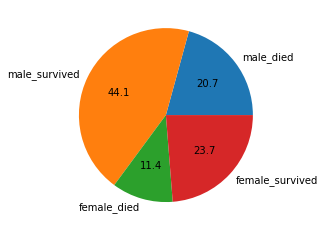

In [111]:
#Distribution of data to see dependency of variables 
sex_mortality = []
sex_mortality.append(len(df[(df['DEATH_EVENT']==1)&(df['sex']==1)]))
sex_mortality.append(len(df[(df['DEATH_EVENT']==0)&(df['sex']==1)]))
sex_mortality.append(len(df[(df['DEATH_EVENT']==1)&(df['sex']==0)]))
sex_mortality.append(len(df[(df['DEATH_EVENT']==0)&(df['sex']==0)]))
sex_labels = ['male_died','male_survived','female_died','female_survived']

plt.pie(x=sex_mortality,autopct='%.1f',labels=sex_labels);


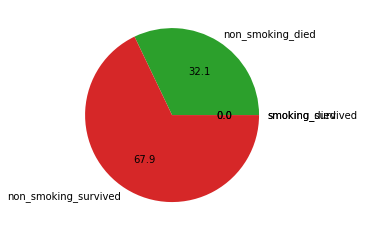

In [112]:
smoking_died = len(df[(df['DEATH_EVENT']==1)&(df['smoking']==1)])
smoking_survived = len(df[(df['DEATH_EVENT']==0)&(df['smoking']==1)])
non_smoking_died = len(df[(df['DEATH_EVENT']==1)&(df['smoking']==0)])
non_smoking_survived = len(df[(df['DEATH_EVENT']==0)&(df['smoking']==0)])

smoking_mortality = []
smoking_mortality.append(len(df[(df['DEATH_EVENT']==1)&(df['smoking']==1)]))
smoking_mortality.append(len(df[(df['DEATH_EVENT']==0)&(df['smoking']==1)]))
smoking_mortality.append(len(df[(df['DEATH_EVENT']==1)&(df['smoking']==0)]))
smoking_mortality.append(len(df[(df['DEATH_EVENT']==0)&(df['smoking']==0)]))


smoking_labels = ['smoking_died','smoking_survived','non_smoking_died','non_smoking_survived']

plt.pie(x=smoking_mortality,autopct='%.1f',labels=smoking_labels);


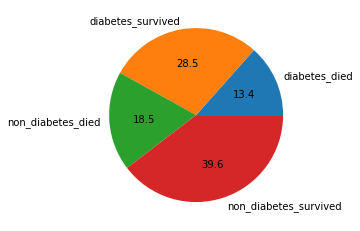

In [113]:
diabetes_died = len(df[(df['DEATH_EVENT']==1)&(df['diabetes']==1)])
diabetes_survived = len(df[(df['DEATH_EVENT']==0)&(df['diabetes']==1)])
non_diabetes_died = len(df[(df['DEATH_EVENT']==1)&(df['diabetes']==0)])
non_diabetes_survived = len(df[(df['DEATH_EVENT']==0)&(df['diabetes']==0)])

diabetes_mortality = []
diabetes_mortality.append(len(df[(df['DEATH_EVENT']==1)&(df['diabetes']==1)]))
diabetes_mortality.append(len(df[(df['DEATH_EVENT']==0)&(df['diabetes']==1)]))
diabetes_mortality.append(len(df[(df['DEATH_EVENT']==1)&(df['diabetes']==0)]))
diabetes_mortality.append(len(df[(df['DEATH_EVENT']==0)&(df['diabetes']==0)]))


diabetes_labels = ['diabetes_died','diabetes_survived','non_diabetes_died','non_diabetes_survived']

plt.pie(x=diabetes_mortality,autopct='%.1f',labels=diabetes_labels);

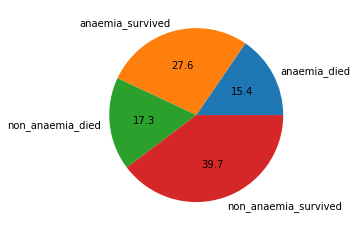

In [114]:
anaemia_died = len(df[(df['DEATH_EVENT']==1)&(df['anaemia']==1)])
anaemia_survived = len(df[(df['DEATH_EVENT']==0)&(df['anaemia']==1)])
non_anaemia_died = len(df[(df['DEATH_EVENT']==1)&(df['anaemia']==0)])
non_anaemia_survived = len(df[(df['DEATH_EVENT']==0)&(df['anaemia']==0)])

anaemia_mortality = []
anaemia_mortality.append(len(df[(df['DEATH_EVENT']==1)&(df['anaemia']==1)]))
anaemia_mortality.append(len(df[(df['DEATH_EVENT']==0)&(df['anaemia']==1)]))
anaemia_mortality.append(len(df[(df['DEATH_EVENT']==1)&(df['anaemia']==0)]))
anaemia_mortality.append(len(df[(df['DEATH_EVENT']==0)&(df['anaemia']==0)]))


anaemia_labels = ['anaemia_died','anaemia_survived','non_anaemia_died','non_anaemia_survived']

plt.pie(x=anaemia_mortality,autopct='%.1f',labels=anaemia_labels);

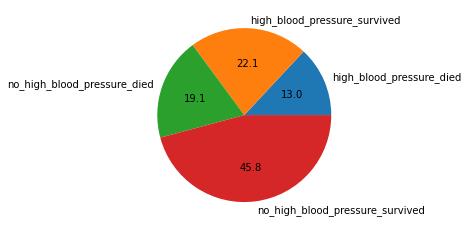

In [115]:
high_blood_pressure_died = len(df[(df['DEATH_EVENT']==1)&(df['high_blood_pressure']==1)])
high_blood_pressure_survived = len(df[(df['DEATH_EVENT']==0)&(df['high_blood_pressure']==1)])
no_high_blood_pressure_died = len(df[(df['DEATH_EVENT']==1)&(df['high_blood_pressure']==0)])
no_high_blood_pressure_survived = len(df[(df['DEATH_EVENT']==0)&(df['high_blood_pressure']==0)])

high_blood_pressure_mortality = []
high_blood_pressure_mortality.append(len(df[(df['DEATH_EVENT']==1)&(df['high_blood_pressure']==1)]))
high_blood_pressure_mortality.append(len(df[(df['DEATH_EVENT']==0)&(df['high_blood_pressure']==1)]))
high_blood_pressure_mortality.append(len(df[(df['DEATH_EVENT']==1)&(df['high_blood_pressure']==0)]))
high_blood_pressure_mortality.append(len(df[(df['DEATH_EVENT']==0)&(df['high_blood_pressure']==0)]))


high_blood_pressure_labels = ['high_blood_pressure_died','high_blood_pressure_survived','no_high_blood_pressure_died','no_high_blood_pressure_survived']

plt.pie(x=high_blood_pressure_mortality,autopct='%.1f',labels=high_blood_pressure_labels);

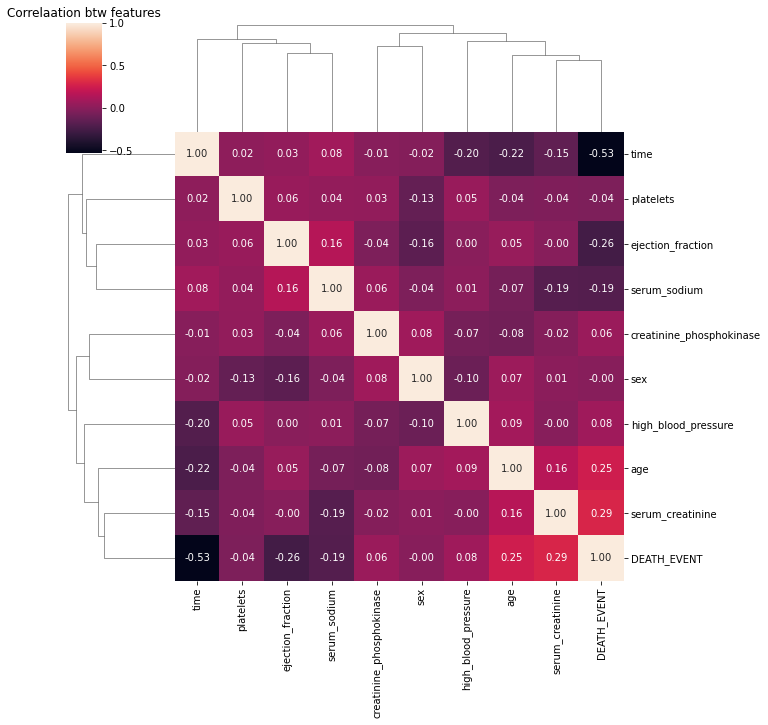

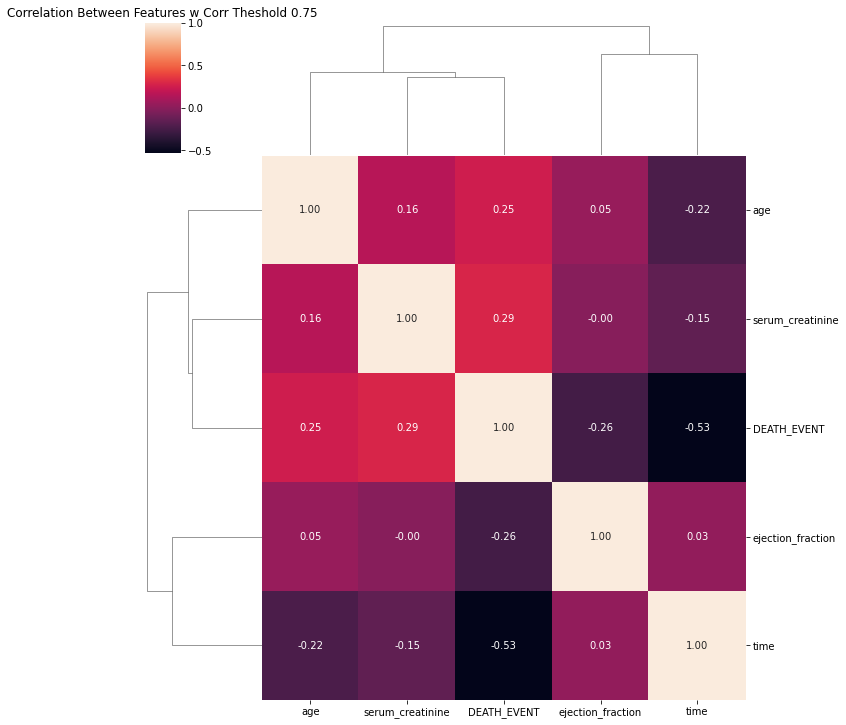

In [116]:
#Correlation mapping 
df1=df.drop(["smoking"], axis = 1, inplace = True)
corr_matrix = df.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlaation btw features")
threshold = 0.2 
filtre = np.abs(corr_matrix["DEATH_EVENT"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(df[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features w Corr Theshold 0.75")
plt.show()

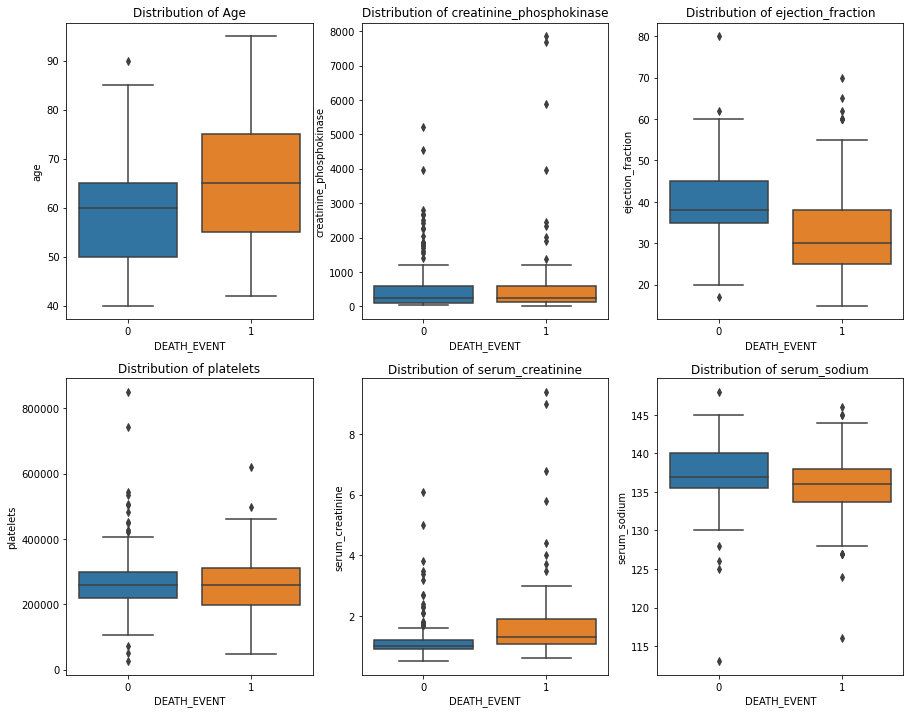

In [117]:
#Detecting Outliers in the data
plt.figure(figsize=(15, 12))

plt.subplot(2,3,1)
sns.boxplot(x='DEATH_EVENT', y='age', data=df)
plt.title('Distribution of Age')

plt.subplot(2,3,2)
sns.boxplot(x='DEATH_EVENT', y='creatinine_phosphokinase', data=df)
plt.title('Distribution of creatinine_phosphokinase')

plt.subplot(2,3,3)
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df)
plt.title('Distribution of ejection_fraction')

plt.subplot(2,3,4)
sns.boxplot(x='DEATH_EVENT', y='platelets', data=df)
plt.title('Distribution of platelets')

plt.subplot(2,3,5)
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df)
plt.title('Distribution of serum_creatinine')

plt.subplot(2,3,6)
sns.boxplot(x='DEATH_EVENT', y='serum_sodium', data=df)
plt.title('Distribution of serum_sodium');

In [121]:
#Removing Outliers
df2=df2[df['creatinine_phosphokinase']<1300]
df2=df2[df['ejection_fraction']<60]
df2=df2[(df['platelets']>100000) & (df['platelets']<420000)]
df2=df2[df['serum_creatinine']<1.5]
df2=df2[df['serum_sodium']>126]


<ipython-input-121-604eb3c7fb6b>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-121-604eb3c7fb6b>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-121-604eb3c7fb6b>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-121-604eb3c7fb6b>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-121-604eb3c7fb6b>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Skewness Coefficient of creatinine_phosphokinase is 1.03


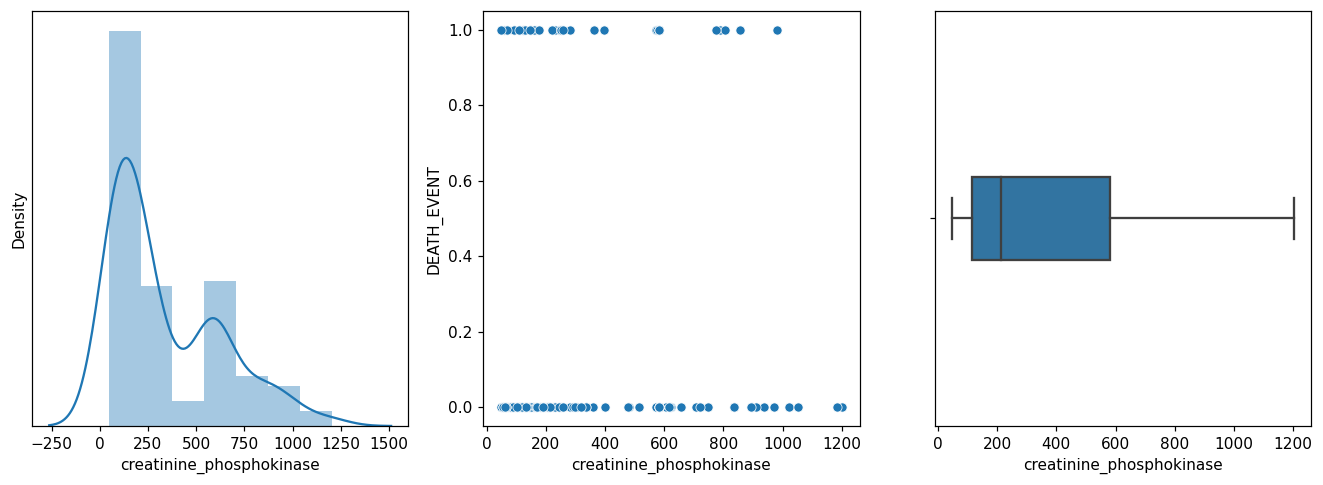

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Skewness Coefficient of ejection_fraction is -0.19


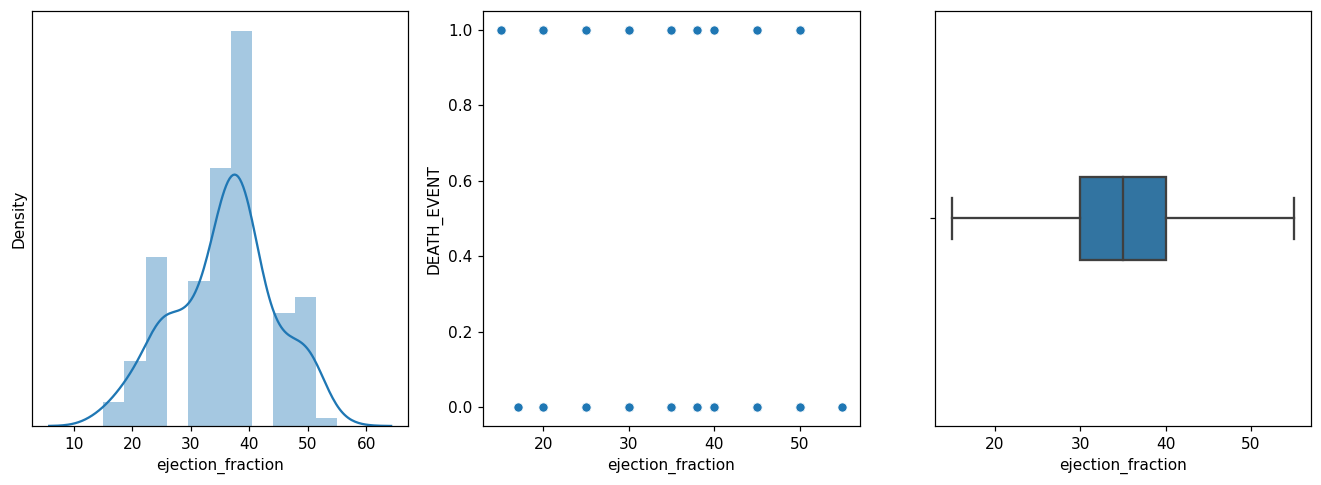

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Skewness Coefficient of platelets is 0.23


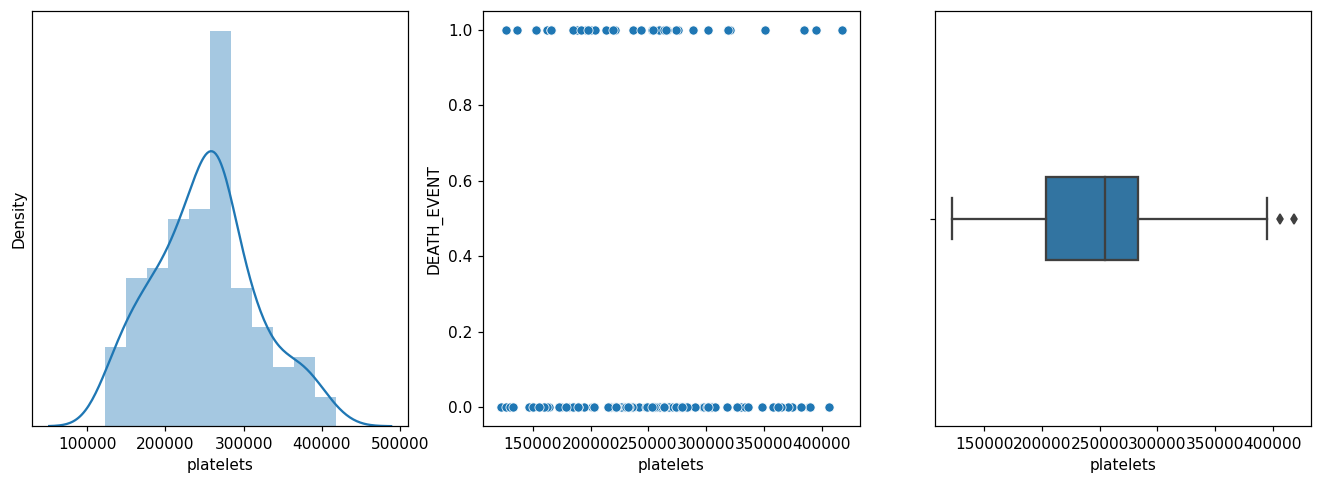

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Skewness Coefficient of serum_creatinine is -0.07


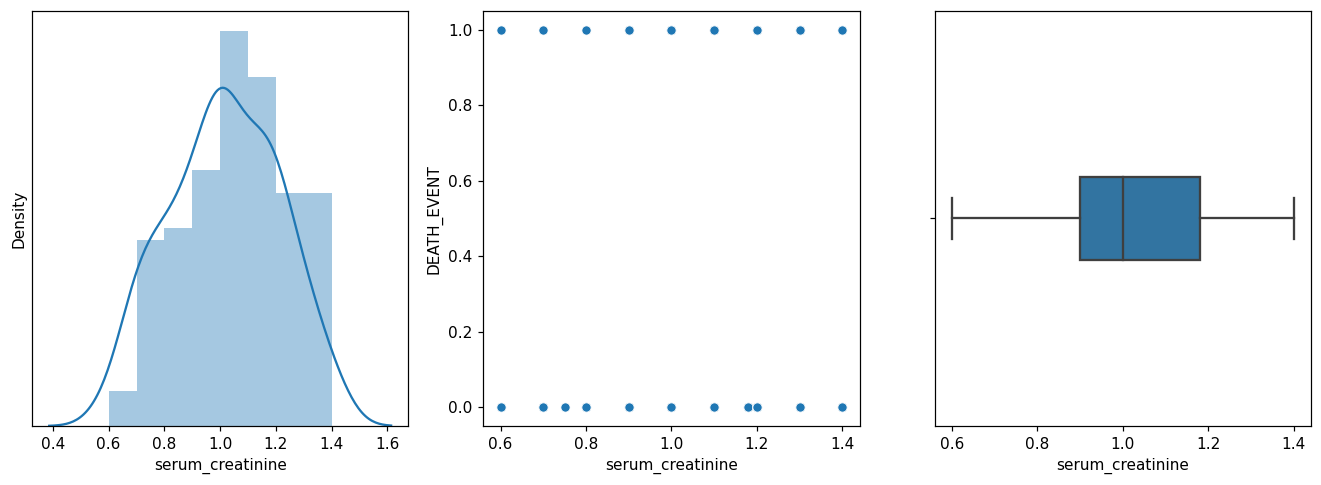

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Skewness Coefficient of serum_sodium is -0.09


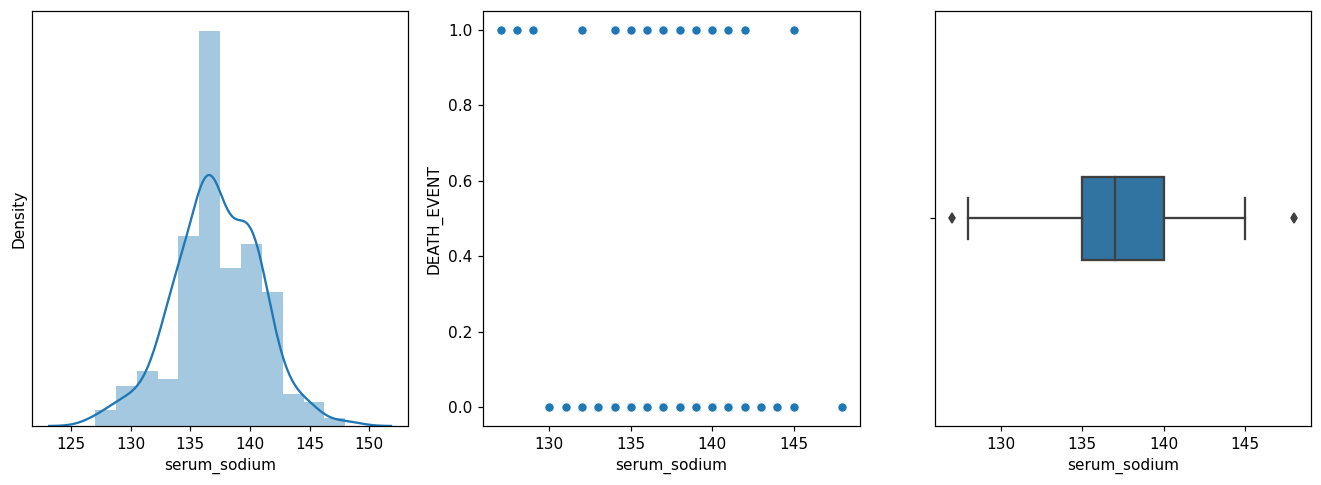

In [122]:
#Checking the data after removing outliers 
def displot_numeric_features(feature):#code to visualize distribution, scatterplot and boxplot
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=110)
    
    sns.distplot(df2[feature], ax=ax1)
    sns.scatterplot(df2[feature], df2["DEATH_EVENT"], ax=ax2)
    sns.boxplot(df2[feature],orient='h', ax=ax3, width=0.2)

    print(f"Skewness Coefficient of {feature} is {df2[feature].skew():.2f}")
    ax1.set_yticks([])
    
    return plt
displot_numeric_features("creatinine_phosphokinase").show()
displot_numeric_features("ejection_fraction").show()
displot_numeric_features("platelets").show()
displot_numeric_features("serum_creatinine").show()
displot_numeric_features("serum_sodium").show()

In [123]:
#separating features
x = df[[c for c in df.columns if c != 'DEATH_EVENT']] 
y = df['DEATH_EVENT']

In [124]:
#Balancing the data
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 203, 1: 96})
Resample dataset shape Counter({1: 203, 0: 203})


In [125]:
#splitting data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.4, random_state=0)
X_train.shape

(243, 11)

In [126]:
#Scaling the data 
from sklearn.preprocessing import MinMaxScaler #scaling all the features

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [127]:
#Model building 
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression 
logmodel = LogisticRegression()
logmodel.fit(X_train_scaled,y_train)
predictions = logmodel.predict(X_test_scaled)

#Printing classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80        79
           1       0.78      0.90      0.84        84

    accuracy                           0.82       163
   macro avg       0.83      0.82      0.82       163
weighted avg       0.83      0.82      0.82       163

[[58 21]
 [ 8 76]]


<AxesSubplot:>

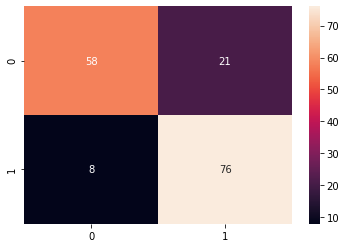

In [130]:
#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,predictions)
sns.heatmap(confusion_matrix, annot=True)

In [131]:
#Conclusive data visualisations 
fig = px.histogram(df, x="time", color="DEATH_EVENT", marginal="violin", hover_data=df.columns, 
                   title ="Distribution of TIME Vs DEATH_EVENT", 
                   labels={"time": "TIME"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()
#lesser the follow up time, higher the death rate

In [132]:
fig = px.histogram(df, x="serum_creatinine", color="DEATH_EVENT", marginal="violin", hover_data=df.columns, 
                   title ="Distribution of SERUM CREATININE Vs DEATH_EVENT", 
                   labels={"serum_creatinine": "SERUM CREATININE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()
#lower the serum creatinine level, higher the death rate

In [133]:
fig = px.histogram(df, x="ejection_fraction", color="DEATH_EVENT", marginal="violin", hover_data=df.columns, 
                   title ="Distribution of EJECTION FRACTION Vs DEATH_EVENT", 
                   labels={"ejection_fraction": "EJECTION FRACTION"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()
#Higher the ejection fraction lower is the death rate 

In [134]:
fig = px.histogram(df, x="age", color="DEATH_EVENT", marginal="violin", hover_data=df.columns, 
                   title ="Distribution of AGE Vs DEATH_EVENT", 
                   labels={"age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()
#higher the age of a patient, higher is the chances of death event

In [135]:
fig = px.histogram(df, x="creatinine_phosphokinase", color="DEATH_EVENT", marginal="violin", hover_data=df.columns, 
                   title ="Distribution of CREATININE PHOSPHOKINASE Vs DEATH_EVENT", 
                   labels={"creatinine_phosphokinase": "CREATININE PHOSPHOKINASE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()
#lower the Creatine Phosphokinase level higher is the death rate